<h1 style="color:green" align="center">Loan eligibility prediction</h1>

<h3 style="color:purple"> problem statement:</h3>

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

<a href="https://www.kaggle.com/vikasukani/loan-eligible-dataset">Dataset on kaggle</a>

<img src="loan_prediction.JPG" >


#### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

#### loading dataset from csv file

In [3]:
# train dateset
train=pd.read_csv(r'E:\step to ML\DataSets\Loan eligibility for home\loan-train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# test dataset
test=pd.read_csv(r'E:\step to ML\DataSets\Loan eligibility for home\loan-test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### exploring dataset

In [6]:
train.shape

(614, 13)

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
len(train.columns)

13

In [21]:
test.shape

(367, 12)

#### checking for null values

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
def make_dataframe_for_nan(df):
    nan_features=[]
    nan_rows_feature=[]
    perc_nan_rows=[]
    rounded_perc_nan_rows=[]
    for feature in df.columns:
        if (df[feature].isnull().sum())>0:
            nan_rows=df[feature].isnull().sum()
            nan_rows_per=nan_rows/len(df)*100
            rounded_nan_rows_per=np.round(nan_rows_per)
            nan_features.append(feature)
            nan_rows_feature.append(nan_rows)
            perc_nan_rows.append(nan_rows_per)
            rounded_perc_nan_rows.append(rounded_nan_rows_per)
    nan= pd.DataFrame(list(zip(nan_features,nan_rows_feature,perc_nan_rows,rounded_perc_nan_rows)),columns =['feature Name','no of nan rows','percentage of nan rows','rounded percentage of nan rows'])
    nan.index = nan.index + 1
    return nan

In [25]:
nan_dataframe=make_dataframe_for_nan(train)
nan_dataframe

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,Gender,13,2.117264,2.0
2,Married,3,0.488599,0.0
3,Dependents,15,2.442997,2.0
4,Self_Employed,32,5.211726,5.0
5,LoanAmount,22,3.583062,4.0
6,Loan_Amount_Term,14,2.280130,2.0
7,Credit_History,50,8.143322,8.0


In [11]:
def list_of_high_nan_features(df):
    high_null_features=[]
    for feature in df.columns:
        nan=df[feature].isnull().sum()
        per_nan=nan/len(df)*100
        if per_nan>=40:
            high_null_features.append(feature)
    if len(high_null_features)==0:
        print("there is no  high null feature in dataframe")
        return []
    else:
        return high_null_features

In [12]:
high_nan_features=list_of_high_nan_features(train)
high_nan_features

there is no  high null feature in dataframe


[]

#### categorical features

In [13]:
for feature in train.columns:
    if len(train[feature].unique())<10:
        print(feature,train[feature].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Credit_History [ 1.  0. nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [14]:
catag_features=[feature for feature in train.columns if len(train[feature].unique())<10]
catag_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [15]:
len(catag_features)

8

#### numerical features

In [16]:
quant_features=[feature for feature in train.columns if (train[feature].dtype!='O' and len(train[feature].unique())>10)]
quant_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [17]:
len(quant_features)

4

In [18]:
large_catagary_features=[feature for feature in train.columns if (train[feature].dtype=='O' and len(train[feature].unique())>10)]
large_catagary_features

['Loan_ID']

##### replace values of yes and no with 1 and 0

In [19]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [20]:
train['Loan_Status']=train['Loan_Status'].replace(['Y', 'N'],[1,0])
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Exploratory data analysis

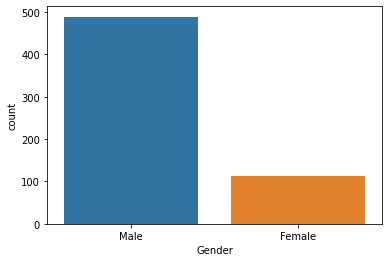

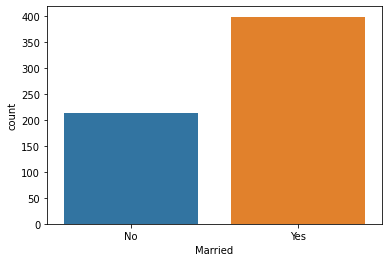

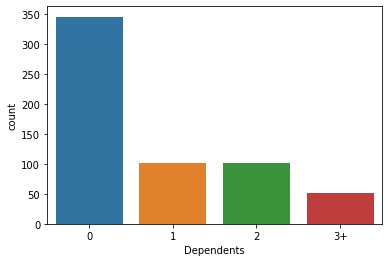

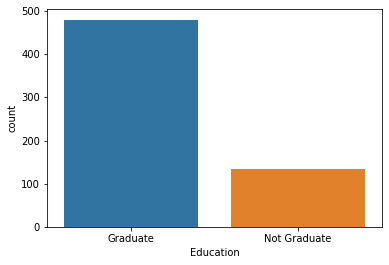

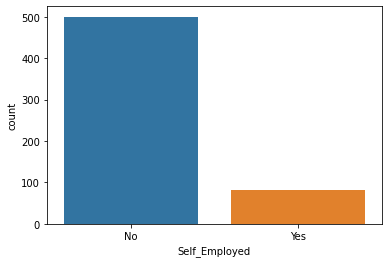

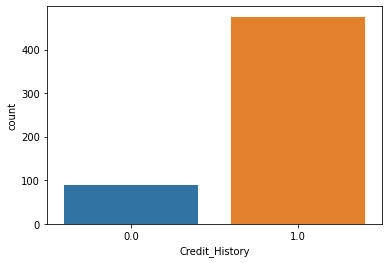

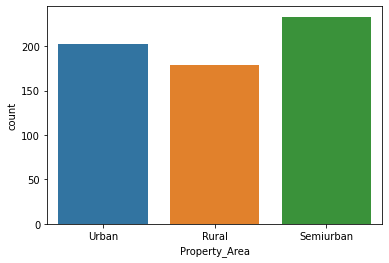

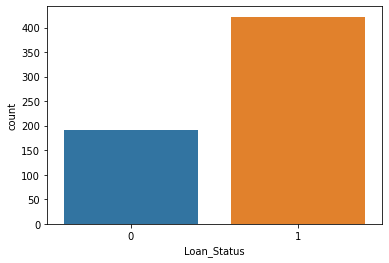

In [21]:
for feature in train.columns:
    if len(train[feature].unique())<10:
        sns.countplot(x=feature,data=train)
        plt.show()

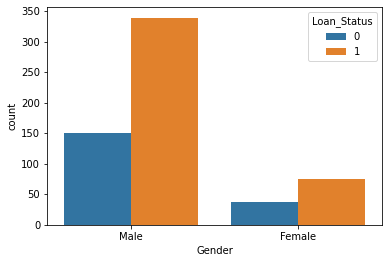

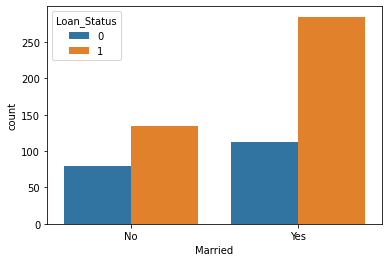

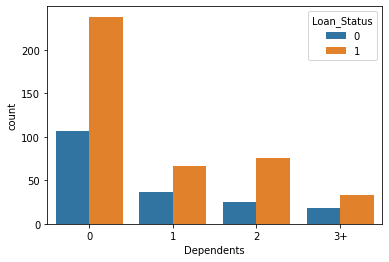

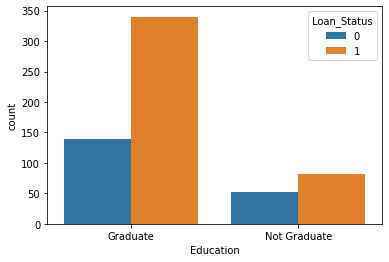

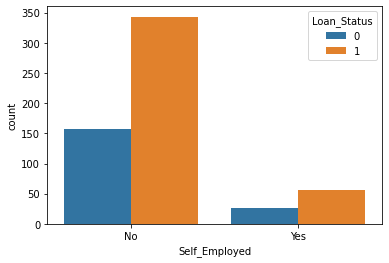

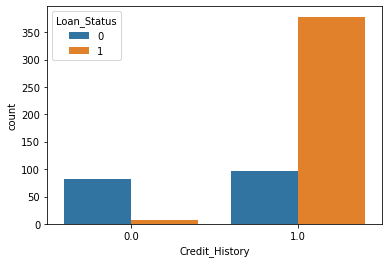

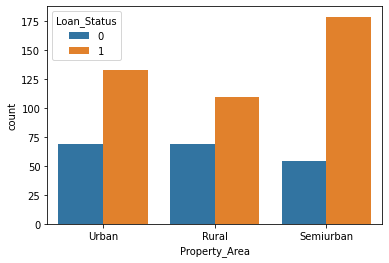

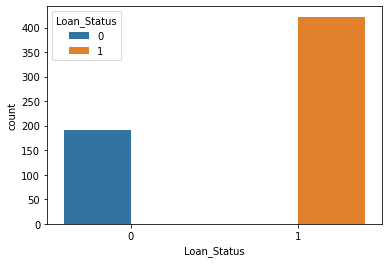

In [37]:
for feature in train.columns:
    if len(train[feature].unique())<10:
        sns.countplot(x=feature,data=train,hue='Loan_Status')
        plt.show()

0.6932515337423313
0.6696428571428571


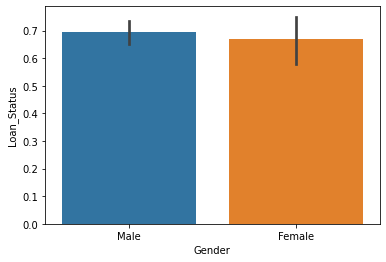

0.6291079812206573
0.7160804020100503


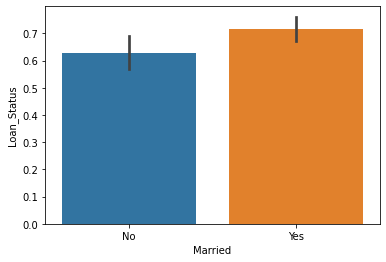

0.6898550724637681
0.6470588235294118


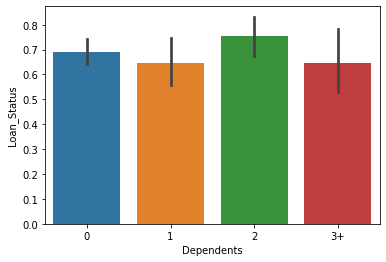

0.7083333333333334
0.6119402985074627


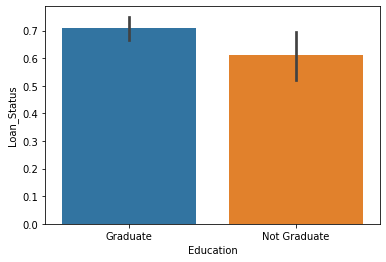

0.686
0.6829268292682927


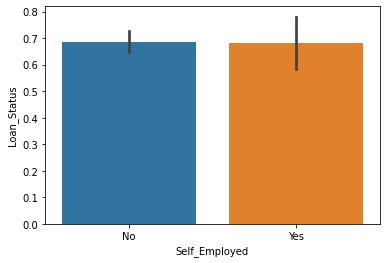

0.7957894736842105
0.07865168539325842


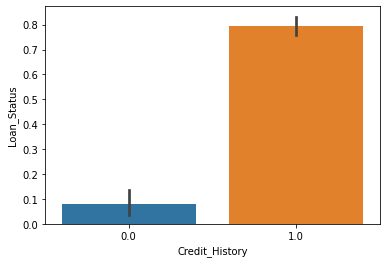

0.6584158415841584
0.6145251396648045


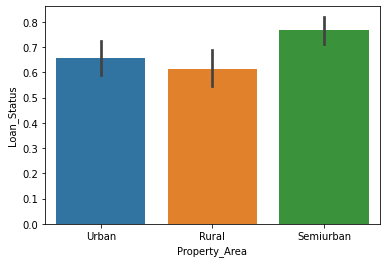

1.0
0.0


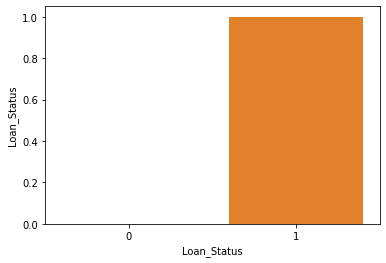

In [38]:
for feature in train.columns:
    if len(train[feature].unique())<10:
        print(train['Loan_Status'][train[feature]==train[feature].unique()[0]].mean())
        print(train['Loan_Status'][train[feature]==train[feature].unique()[1]].mean())
        sns.barplot(x=feature,y='Loan_Status',data=train)
        plt.show()

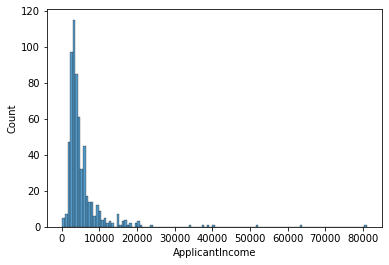

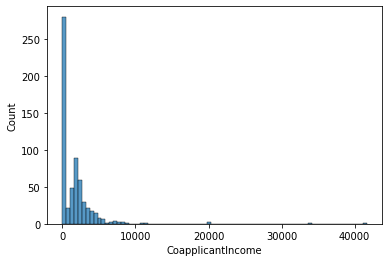

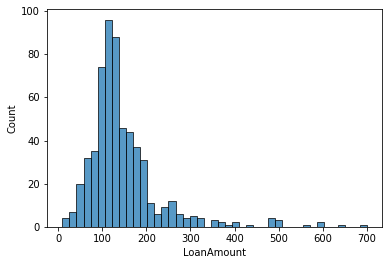

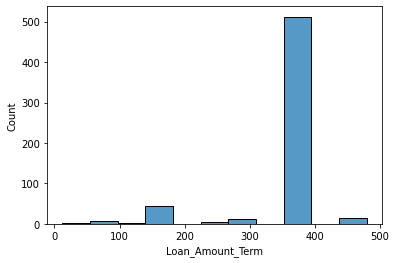

In [39]:
for feature in train.columns:
    if (train[feature].dtype!='O' and len(train[feature].unique())>10):
        sns.histplot(train[feature])
        plt.show()

In [40]:
# sns.heatmap(train[quant_features].corr(),annot=True)  

In [41]:
x=pd.pivot_table(train,index='Loan_Status',values=quant_features)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
0,5446.078125,1877.807292,151.220994,344.064516
1,5384.068720,1504.516398,144.294404,341.072464


### feature engineering

In [42]:
Loan_Id=test['Loan_ID']

In [43]:
df=pd.concat([train,test],axis=0).reset_index(drop=True)
df.shape

(981, 13)

In [44]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [45]:
df_nan=make_dataframe_for_nan(df)
df_nan

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,Gender,24,2.446483,2.0
2,Married,3,0.305810,0.0
3,Dependents,25,2.548420,3.0
4,Self_Employed,55,5.606524,6.0
5,LoanAmount,27,2.752294,3.0
6,Loan_Amount_Term,20,2.038736,2.0
7,Credit_History,79,8.053007,8.0
8,Loan_Status,367,37.410805,37.0


In [46]:
high_nan_features=list_of_high_nan_features(df)
high_nan_features

there is no  high null feature in dataframe


[]

### visulization of that how many rows droppeed

In [47]:
df.shape

(981, 13)

In [48]:
df.dropna().shape

(480, 13)

In [49]:
non_null_rows_per=df.iloc[:,:12].dropna().shape[0]/len(df)*100
null_rows_per=100-non_null_rows_per
print(null_rows_per)

21.610601427115185


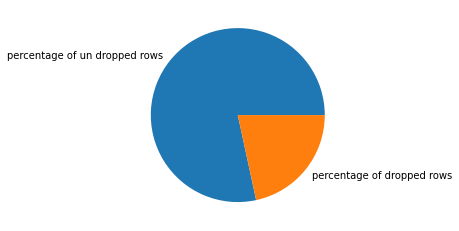

In [50]:
exp_vals=[non_null_rows_per,null_rows_per]
exp_labels=['percentage of un dropped rows','percentage of dropped rows']
plt.pie(exp_vals,labels=exp_labels)
plt.show()

### first way :drop all null values

In [51]:
# df=df.dropna()
# print('shape after dropping ',df.shape)

### 2nd:way fill with zero

In [52]:
# df=df.fillna(0)

### 3rd way: fiill null_values with mode of that feature

In [53]:
# for feature in df.columns:
#     if df[feature].isnull().sum()>0:
#         df[feature]=df[feature].fillna(df[feature].mode()[0])

### 4rd way

In [54]:
catag_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [55]:
df[catag_features].isnull().sum()

Gender             24
Married             3
Dependents         25
Education           0
Self_Employed      55
Credit_History     79
Property_Area       0
Loan_Status       367
dtype: int64

In [56]:
for feature in catag_features:
    if df[feature].isnull().sum()>0:
        df[feature]=df[feature].fillna(df[feature].mode()[0])

### 4th way

In [57]:
# do above manually for every feature

### 5th way

In [58]:
df['LoanAmount'].mean()

142.51153039832286

In [59]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [60]:
df['Loan_Amount_Term'].mean()

342.2018730489074

In [61]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

### 6th way:

In [62]:
df['LoanAmount'].median()

128.0

In [63]:
df['Loan_Amount_Term'].median()

360.0

In [64]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [65]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

### 7th way:complex fill

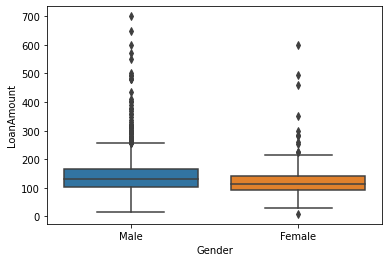

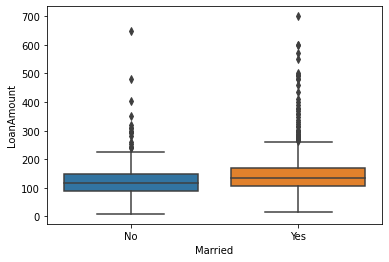

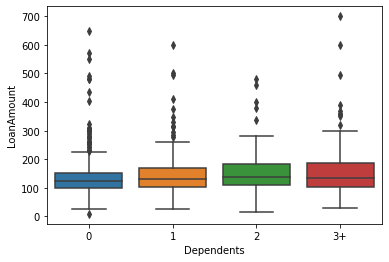

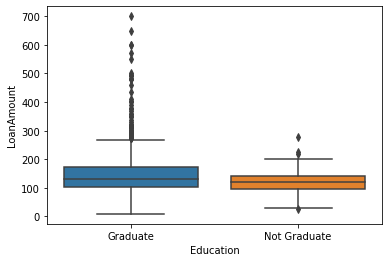

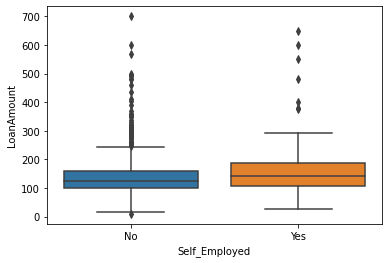

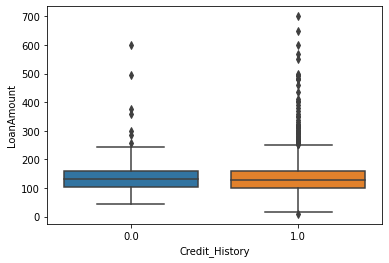

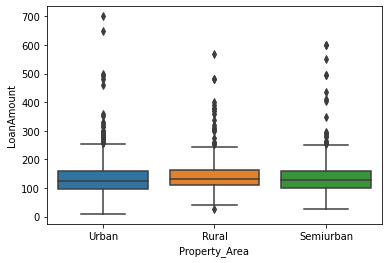

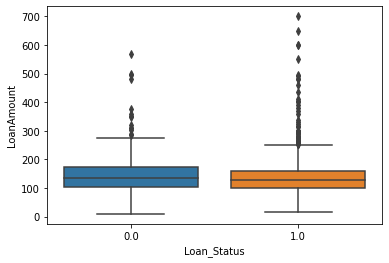

In [66]:
for feature in catag_features:
    sns.boxplot(x=feature,y='LoanAmount',data=df)
    plt.show()  

In [67]:
### un_completed

In [68]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### feature transformation:

In [69]:
quant_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

Skew ofApplicantIncome is:7.086961153594506


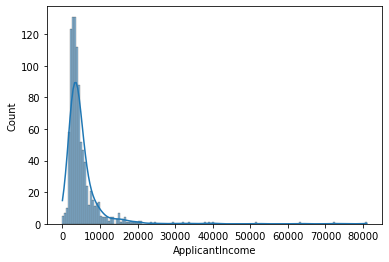

Skew ofCoapplicantIncome is:6.844108581480271


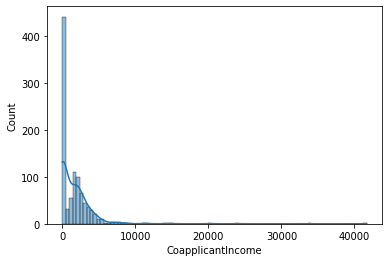

Skew ofLoanAmount is:2.752054617168129


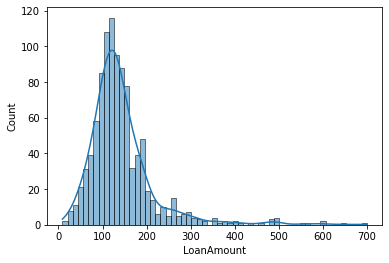

Skew ofLoan_Amount_Term is:-2.502958777682449


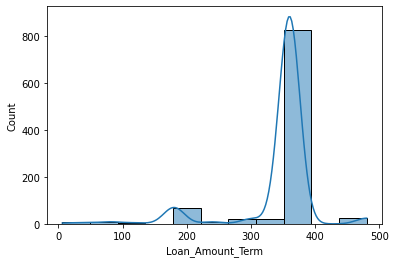

In [70]:
for feature in quant_features:
    skew=df[feature].skew()
    print(f'Skew of{feature} is:{skew}')
    sns.histplot(df[feature],kde='True')
    plt.show()   

### ApplicantIncome

In [71]:
df['log_ApplicantIncome']=np.log(df['ApplicantIncome'])
df['log_ApplicantIncome'].skew()

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

3.043175507935635

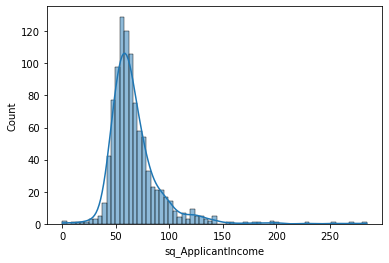

In [72]:
df['sq_ApplicantIncome']=df['ApplicantIncome']**(1/2)
sns.histplot(df['sq_ApplicantIncome'],kde='True')
df['sq_ApplicantIncome'].skew()

2.1863591838696665

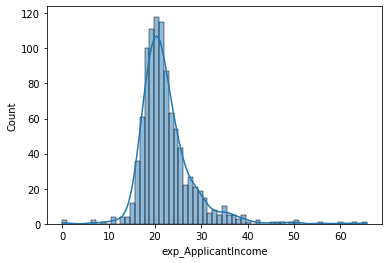

In [73]:
df['exp_ApplicantIncome']=df['ApplicantIncome']**(1/2.7)
sns.histplot(df['exp_ApplicantIncome'],kde='True')
df['exp_ApplicantIncome'].skew()

skew 0.37333764973949285


<AxesSubplot:xlabel='ApplicantIncome_YJ', ylabel='Count'>

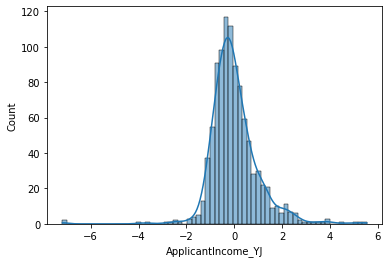

In [74]:
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
ptdata=pd.DataFrame(pt.fit_transform(df['ApplicantIncome'].values.reshape(-1,1)),columns=['ApplicantIncome_YJ']) ### need to understand code
print('skew',ptdata['ApplicantIncome_YJ'].skew())
sns.histplot(ptdata['ApplicantIncome_YJ'],kde='True')

In [75]:
df['ApplicantIncome_tranformed']=ptdata['ApplicantIncome_YJ']

In [76]:
df.drop(labels = ['log_ApplicantIncome', 'sq_ApplicantIncome','exp_ApplicantIncome'], axis = 1, inplace = True)

In [77]:
df['ApplicantIncome_tranformed'].min(),df['ApplicantIncome_tranformed'].max()

(-7.183683050552863, 5.534979158059303)

In [78]:
df.drop(labels = ["ApplicantIncome"], axis = 1, inplace = True) #drop actual Fare feature from the dataset

### CoapplicantIncome

In [79]:
df['CoapplicantIncome'].skew()

6.844108581480271

In [80]:
df['log_CoapplicantIncome']=np.log(df['CoapplicantIncome'])
df['log_CoapplicantIncome'].skew()

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

0.8586067507480066

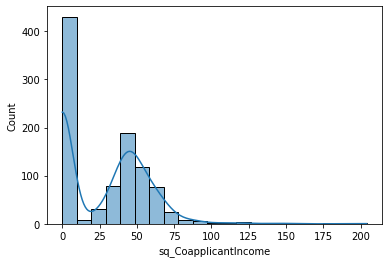

In [81]:
df['sq_CoapplicantIncome']=df['CoapplicantIncome']**(1/2)
sns.histplot(df['sq_CoapplicantIncome'],kde='True')
df['sq_CoapplicantIncome'].skew()

0.2709097756846954

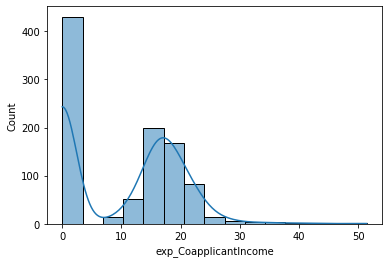

In [82]:
df['exp_CoapplicantIncome']=df['CoapplicantIncome']**(1/2.7)
sns.histplot(df['exp_CoapplicantIncome'],kde='True')
df['exp_CoapplicantIncome'].skew()

skew -0.1665200126717774


<AxesSubplot:xlabel='CoapplicantIncome_YJ', ylabel='Count'>

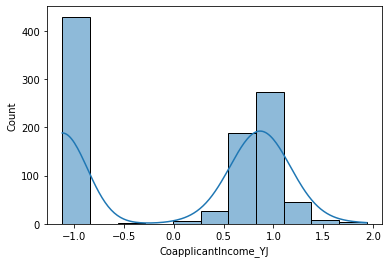

In [83]:
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
ptdata=pd.DataFrame(pt.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1)),columns=['CoapplicantIncome_YJ']) ### need to understand code
print('skew',ptdata['CoapplicantIncome_YJ'].skew())
sns.histplot(ptdata['CoapplicantIncome_YJ'],kde='True')

In [84]:
df['CoapplicantIncome_tranformed']=ptdata['CoapplicantIncome_YJ']

In [85]:
df.drop(labels = ['log_CoapplicantIncome',
       'sq_CoapplicantIncome',
       'CoapplicantIncome_tranformed'], axis = 1, inplace = True)

In [86]:
df['exp_CoapplicantIncome'].min(),df['exp_CoapplicantIncome'].max()

(0.0, 51.408408622412566)

In [87]:
df.drop(labels = ["CoapplicantIncome"], axis = 1, inplace = True) #drop actual Fare feature from the dataset

### LoanAmount

In [88]:
df['LoanAmount'].skew()

2.752054617168129

-0.21502897075612312

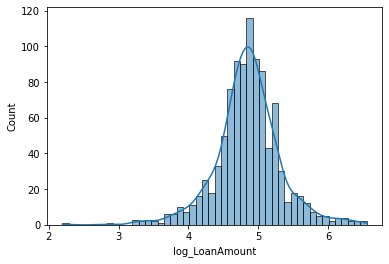

In [89]:
df['log_LoanAmount']=np.log(df['LoanAmount'])
sns.histplot(df['log_LoanAmount'],kde='True')
df['log_LoanAmount'].skew()

1.2693726241712515

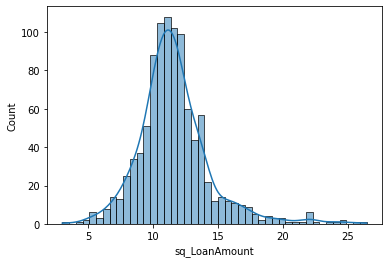

In [90]:
df['sq_LoanAmount']=df['LoanAmount']**(1/2)
sns.histplot(df['sq_LoanAmount'],kde='True')
df['sq_LoanAmount'].skew()

0.8970330415645208

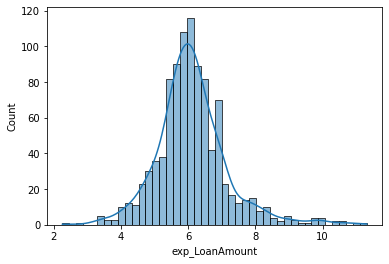

In [91]:
df['exp_LoanAmount']=df['LoanAmount']**(1/2.7)
sns.histplot(df['exp_LoanAmount'],kde='True')
df['exp_LoanAmount'].skew()

skew 0.023915588597691537


<AxesSubplot:xlabel='LoanAmount_YJ', ylabel='Count'>

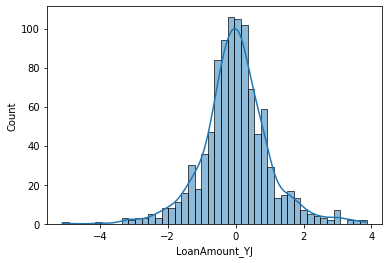

In [92]:
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
ptdata=pd.DataFrame(pt.fit_transform(df['LoanAmount'].values.reshape(-1,1)),columns=['LoanAmount_YJ']) ### need to understand code
print('skew',ptdata['LoanAmount_YJ'].skew())
sns.histplot(ptdata['LoanAmount_YJ'],kde='True')

In [93]:
df['LoanAmount_tranformed']=ptdata['LoanAmount_YJ']

In [94]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'ApplicantIncome_tranformed',
       'exp_CoapplicantIncome', 'log_LoanAmount', 'sq_LoanAmount',
       'exp_LoanAmount', 'LoanAmount_tranformed'],
      dtype='object')

In [95]:
df.drop(labels = ['log_LoanAmount',
       'sq_LoanAmount', 'exp_LoanAmount'], axis = 1, inplace = True)

In [96]:
df['LoanAmount_tranformed'].min(),df['LoanAmount_tranformed'].max()

(-5.106183868616452, 3.858244605855702)

In [97]:
df.drop(labels = ["LoanAmount"], axis = 1, inplace = True) #drop actual Fare feature from the dataset

### loan amount term

In [98]:
df['Loan_Amount_Term'].skew()

-2.502958777682449

-5.718018228736006

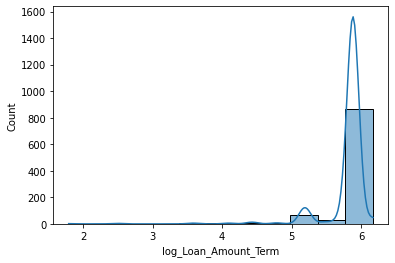

In [99]:
df['log_Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])
sns.histplot(df['log_Loan_Amount_Term'],kde='True')
df['log_Loan_Amount_Term'].skew()

-3.4213020891417063

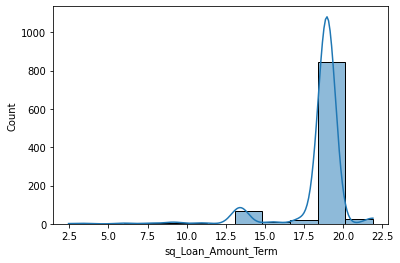

In [100]:
df['sq_Loan_Amount_Term']=df['Loan_Amount_Term']**(1/2)
sns.histplot(df['sq_Loan_Amount_Term'],kde='True')
df['sq_Loan_Amount_Term'].skew()

-3.8030773178480626

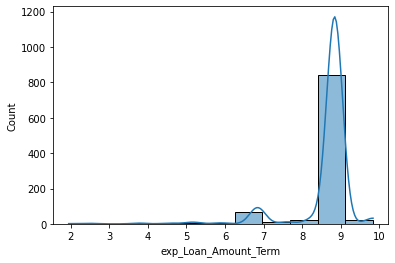

In [101]:
df['exp_Loan_Amount_Term']=df['Loan_Amount_Term']**(1/2.7)
sns.histplot(df['exp_Loan_Amount_Term'],kde='True')
df['exp_Loan_Amount_Term'].skew()

skew 0.36307393591940146


<AxesSubplot:xlabel='Loan_Amount_Term_YJ', ylabel='Count'>

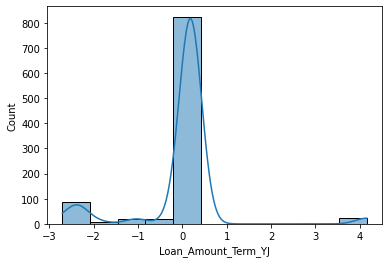

In [102]:
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
ptdata=pd.DataFrame(pt.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1)),columns=['Loan_Amount_Term_YJ']) ### need to understand code
print('skew',ptdata['Loan_Amount_Term_YJ'].skew())
sns.histplot(ptdata['Loan_Amount_Term_YJ'],kde='True')

In [103]:
df['Loan_Amount_Term_tranformed']=ptdata['Loan_Amount_Term_YJ']

In [104]:
df.drop(labels = ['log_Loan_Amount_Term', 'sq_Loan_Amount_Term',
       'exp_Loan_Amount_Term'], axis = 1, inplace = True)

In [105]:
df['Loan_Amount_Term_tranformed'].min(),df['LoanAmount_tranformed'].max()

(-2.7054631180923114, 3.858244605855702)

In [106]:
df.drop(labels = ["Loan_Amount_Term"], axis = 1, inplace = True) #drop actual Fare feature from the dataset

### one hot encoding

***converting catagarical data into 0 and 1***

In [107]:
num_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
num_features

['Credit_History',
 'Loan_Status',
 'ApplicantIncome_tranformed',
 'exp_CoapplicantIncome',
 'LoanAmount_tranformed',
 'Loan_Amount_Term_tranformed']

In [108]:
len(num_features)

6

In [109]:
non_num_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
non_num_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

##### gender

In [110]:
df=pd.get_dummies(df, columns = ["Gender"],drop_first=True, prefix="G")

In [111]:
df=pd.get_dummies(df, columns = ["Married"],drop_first=True, prefix="M")

In [112]:
df=pd.get_dummies(df, columns = ['Dependents'],drop_first=True, prefix="Dep")

In [113]:
df=pd.get_dummies(df, columns = ["Education"],drop_first=True, prefix="Edu")

In [114]:
df=pd.get_dummies(df, columns = ["Self_Employed"],drop_first=True, prefix="S_emp")

In [115]:
df=pd.get_dummies(df, columns = ["Property_Area"],drop_first=True, prefix="p_area")

In [116]:
df.drop(['Loan_ID'],axis=1,inplace = True)

In [117]:
df.shape

(981, 15)

In [118]:
df

,Credit_History,Loan_Status,ApplicantIncome_tranformed,exp_CoapplicantIncome,LoanAmount_tranformed,Loan_Amount_Term_tranformed,G_Male,M_Yes,Dep_1,Dep_2,Dep_3+,Edu_Not Graduate,S_emp_Yes,p_area_Semiurban,p_area_Urban
0,1.0,1.0,0.508348,0.000000,0.220665,0.185238,1,0,0,0,0,0,0,0,1
1,1.0,0.0,0.132815,15.037848,-0.010657,0.185238,1,1,1,0,0,0,0,0,0
2,1.0,1.0,-0.488419,0.000000,-1.397638,0.185238,1,1,0,0,0,0,1,0,1
3,1.0,1.0,-0.698749,17.745584,-0.148814,0.185238,1,1,0,0,0,1,0,0,1
4,1.0,1.0,0.548373,0.000000,0.197617,0.185238,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1.0,1.0,-0.067557,15.980411,-0.276897,0.185238,1,1,0,0,1,1,1,0,1
977,1.0,1.0,-0.013303,11.370902,-0.239568,0.185238,1,1,0,0,0,0,0,0,1
978,1.0,1.0,-0.374015,16.673998,-0.044429,0.185238,1,0,0,0,0,0,0,1,0
979,1.0,1.0,0.265348,17.842687,0.444573,0.185238,1,1,0,0,0,0,0,0,0


### checking for non_numerical features

In [119]:
non_num_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
non_num_features

[]

#### spliting

In [120]:
train=df.iloc[:len(train)]

### relationship

In [121]:
c_matrix=train.corr()

In [122]:
c_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status                    1.000000
Credit_History                 0.540556
p_area_Semiurban               0.136540
M_Yes                          0.091478
Dep_2                          0.062384
exp_CoapplicantIncome          0.028266
G_Male                         0.017987
ApplicantIncome_tranformed     0.007713
S_emp_Yes                     -0.003700
Dep_3+                        -0.026123
Dep_1                         -0.038740
LoanAmount_tranformed         -0.041730
p_area_Urban                  -0.043621
Loan_Amount_Term_tranformed   -0.051074
Edu_Not Graduate              -0.085884
Name: Loan_Status, dtype: float64

In [123]:
strong_relation_features=[]
for feature in c_matrix['Loan_Status'].sort_values(ascending=False).keys():
    if c_matrix['Loan_Status'][feature]>=0.04 or c_matrix['Loan_Status'][feature]<=-0.04:
        strong_relation_features.append(feature) 

In [124]:
strong_relation_features.remove('Loan_Status')

In [125]:
strong_relation_features

['Credit_History',
 'p_area_Semiurban',
 'M_Yes',
 'Dep_2',
 'LoanAmount_tranformed',
 'p_area_Urban',
 'Loan_Amount_Term_tranformed',
 'Edu_Not Graduate']

In [126]:
df_strong=df[strong_relation_features]

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# for feature in strong_relation_features:
#     sns.relplot(x=feature,y="Loan_Status",data=df,kind='line')

### feature selection

In [129]:
X=train[strong_relation_features]
y=train['Loan_Status']

In [130]:
# X=train.drop(['Loan_Status'],axis=1)
# y=train['Loan_Status']

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [132]:
selection.feature_importances_

array([0.31210756, 0.01675488, 0.01258115, 0.02552696, 0.53042005,
       0.01603752, 0.06858485, 0.01798704])

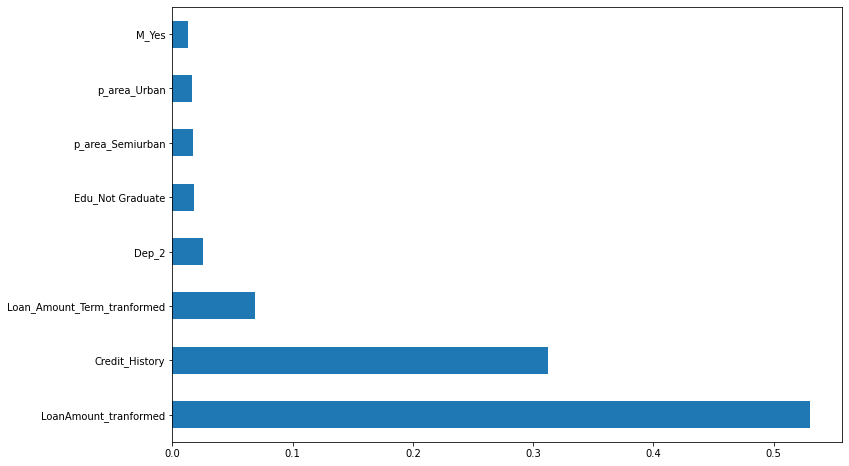

In [133]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [134]:
largest_imp_5=list(feat_importances.nlargest(5).keys())
largest_imp_5

['LoanAmount_tranformed',
 'Credit_History',
 'Loan_Amount_Term_tranformed',
 'Dep_2',
 'Edu_Not Graduate']

In [135]:
# X=train[largest_imp_5]

In [136]:
X.columns

Index(['Credit_History', 'p_area_Semiurban', 'M_Yes', 'Dep_2',
       'LoanAmount_tranformed', 'p_area_Urban', 'Loan_Amount_Term_tranformed',
       'Edu_Not Graduate'],
      dtype='object')

In [137]:
len(X.columns)

8

### cross validation method to check accuracy of all models

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.689053,0.807959,0.724855,0.807932


### split data into train and test part to make prediction

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### creating model

In [140]:
# As Random Forest and logistic regression perform at high accuracy so i choose one of them

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# from sklearn.svm import SVC
# model = SVC()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


### fitting data

In [141]:
model.fit(X_train,y_train)

RandomForestClassifier()

### saving model

In [142]:
# import pickle
# pickle.dump(model, open('model_Loan_eligibility_predictions.pkl','wb'))

### percentage of accuracy

In [143]:
model.score(X_test,y_test)

0.7317073170731707

In [144]:
model.predict(X_test[:5])

array([1., 1., 1., 1., 1.])

In [145]:
X_test[:5]

,Credit_History,p_area_Semiurban,M_Yes,Dep_2,LoanAmount_tranformed,p_area_Urban,Loan_Amount_Term_tranformed,Edu_Not Graduate
350,1.0,1,1,0,1.253785,0,0.185238,0
377,1.0,1,1,0,0.022628,0,0.185238,0
163,1.0,0,1,1,0.444573,0,0.185238,0
609,1.0,0,0,0,-1.248126,0,0.185238,0
132,1.0,1,0,0,-1.277235,0,0.185238,0


### Accuracy VS Precision VS Recall VS f1_score

In [146]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.7317073170731707
Precision: 0.7701149425287356
Recall: 0.8375
F1_score: 0.8023952095808383


### confusion matrix

In [147]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[23 20]
 [13 67]]


### confusion matrix heatmap

Text(69.0, 0.5, 'Truth')

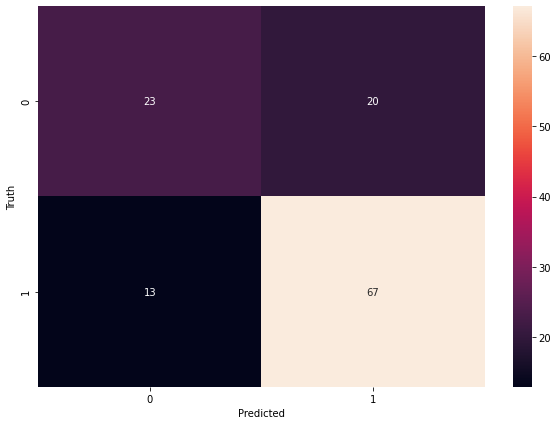

In [148]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [150]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.64      0.53      0.58        43
         1.0       0.77      0.84      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.73      0.73       123



### hyper_parameter_tuning 

#### random searchcv

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [141]:
max_features = ['auto', 'sqrt','log2']

In [142]:
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

In [143]:
min_samples_split = [2, 5, 10,14]

In [144]:
min_samples_leaf = [1, 2, 4,6,8]

In [145]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [146]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [147]:
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [148]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [149]:
best_random_grid=rf_randomcv.best_estimator_

In [150]:
pred=best_random_grid.predict(X_test)

In [151]:
y_predicted=best_random_grid.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [153]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1_score: 0.8586956521739131


### Grid_search_cv

In [152]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [153]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
    'C': [1,5,10]
}, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10]})

In [154]:
clf.best_params_

{'C': 1}

In [155]:
clf.best_score_

0.8125541125541125

In [157]:
clf=clf.best_estimator_

In [159]:
y_predicted=clf.predict(X_test)

In [160]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1_score: 0.8586956521739131


******************************